## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout
from sklearn.manifold import TSNE
import seaborn as sns
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Input

## Part1: Data Preparation

### 1. Load Data Files

In [2]:
# load training data
train = pd.read_csv('train.csv')
# load testing data
test = pd.read_csv('test.csv')

### 1.1 Describe Data

In [3]:
# view first 5 rows of the train dataframe 
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [4]:
# view last 5 rows of the train dataframe
train.tail()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930
989,1584,Quercus_Afares,0.023438,0.019531,0.031250,0.015625,0.005859,0.019531,0.035156,0.0,...,0.000000,0.000000,0.002930,0.000000,0.012695,0.000000,0.000000,0.023438,0.025391,0.022461


In [5]:
# statistical analysis of the train data
train.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [6]:
# columns of the train data
train.columns

Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [8]:
# shape of the data
train.shape

(990, 194)

In [9]:
# view first 5 rows of the test dataframe 
test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [10]:
# view last 5 rows of the test dataframe
test.tail()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
589,1576,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,1577,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,1579,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,1580,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555
593,1583,0.000000,0.117190,0.000000,0.019531,0.000000,0.136720,0.001953,0.005859,0.000000,...,0.107420,0.012695,0.016602,0.000977,0.004883,0.0,0.0,0.015625,0.000000,0.017578


In [11]:
# statistical analysis of the test data
test.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,780.673401,0.017562,0.028425,0.031858,0.022556,0.014527,0.037497,0.019222,0.001085,0.007092,...,0.035291,0.005923,0.015033,0.011762,0.015881,0.011217,0.002617,0.019975,0.009389,0.020970
std,465.646977,0.019585,0.038351,0.025719,0.028797,0.018029,0.051372,0.017122,0.002697,0.009515,...,0.064482,0.026934,0.022318,0.024771,0.014898,0.052530,0.011204,0.034704,0.013457,0.023407
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.500000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,774.000000,0.009766,0.010743,0.023438,0.013672,0.007812,0.013672,0.015625,0.000000,0.005859,...,0.003906,0.000000,0.005859,0.001953,0.012695,0.000000,0.000000,0.003418,0.002930,0.013184
75%,1184.500000,0.028809,0.041016,0.042969,0.027344,0.019531,0.056641,0.029297,0.000000,0.007812,...,0.038086,0.000000,0.019531,0.010498,0.022461,0.000000,0.000000,0.022461,0.014648,0.032227
max,1583.000000,0.085938,0.189450,0.167970,0.164060,0.093750,0.271480,0.087891,0.021484,0.083984,...,0.353520,0.441410,0.153320,0.177730,0.083984,0.606450,0.123050,0.247070,0.086914,0.149410


In [12]:
# columns of the test data
test.columns

Index(['id', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=193)

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.8 KB


In [14]:
# shape of the data
test.shape

(594, 193)

In [15]:
# divide the train data into new two variables X and y and drop id column
X_train = train.drop(columns=['species','id'])
y_train = train[['species']]

In [16]:
# rename test variable and drop id column from the test dat
X_test = test.drop(columns=['id'])

In [17]:
# determine unique classes in the dataset
y_train_unique = pd.unique(y_train['species'])
# length of unique classes
y_train_unique_length = len(y_train_unique)
print('Unique Classes in the Data are',y_train_unique)
print('Number of Unique Classes is:',y_train_unique_length)

Unique Classes in the Data are ['Acer_Opalus' 'Pterocarya_Stenoptera' 'Quercus_Hartwissiana'
 'Tilia_Tomentosa' 'Quercus_Variabilis' 'Magnolia_Salicifolia'
 'Quercus_Canariensis' 'Quercus_Rubra' 'Quercus_Brantii' 'Salix_Fragilis'
 'Zelkova_Serrata' 'Betula_Austrosinensis' 'Quercus_Pontica'
 'Quercus_Afares' 'Quercus_Coccifera' 'Fagus_Sylvatica' 'Phildelphus'
 'Acer_Palmatum' 'Quercus_Pubescens' 'Populus_Adenopoda' 'Quercus_Trojana'
 'Alnus_Sieboldiana' 'Quercus_Ilex' 'Arundinaria_Simonii'
 'Acer_Platanoids' 'Quercus_Phillyraeoides' 'Cornus_Chinensis'
 'Liriodendron_Tulipifera' 'Cytisus_Battandieri'
 'Rhododendron_x_Russellianum' 'Alnus_Rubra' 'Eucalyptus_Glaucescens'
 'Cercis_Siliquastrum' 'Cotinus_Coggygria' 'Celtis_Koraiensis'
 'Quercus_Crassifolia' 'Quercus_Kewensis' 'Cornus_Controversa'
 'Quercus_Pyrenaica' 'Callicarpa_Bodinieri' 'Quercus_Alnifolia'
 'Acer_Saccharinum' 'Prunus_X_Shmittii' 'Prunus_Avium' 'Quercus_Greggii'
 'Quercus_Suber' 'Quercus_Dolicholepis' 'Ilex_Cornuta' 'Tilia

### 1.2 Clean Data
Train data is cleaned and don't need to apply any cleaning approaches to it

Test data also is cleaned and don't need to apply any cleaning approaches to it

### 1.3 Checking the Data for missing or duplicate values

In [18]:
# check missing values for train data
print("Number of missing values in each column in the training data is:\n")
print(train.isna().sum())
print("\nThe sum of all missing values in all column in the training dataframe is:",train.isna().sum().sum())

Number of missing values in each column in the training data is:

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

The sum of all missing values in all column in the training dataframe is: 0


So, there is no missing values in any column in the _**Train Data**_

In [19]:
# check duplicate values for train data
print('Number of duplicated rows in the training data is:',train.duplicated().sum())

Number of duplicated rows in the training data is: 0


So, there is no duplicated values in any column in the _**Train Data**_

In [20]:
# check missing values for train data
print("Number of missing values in each column in the testing data is:\n")
print(train.isna().sum())
print("\nThe sum of all missing values in all column in the testing dataframe is:",test.isna().sum().sum())

Number of missing values in each column in the testing data is:

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

The sum of all missing values in all column in the testing dataframe is: 0


So, there is no missing values in any column in the _**Test Data**_

In [21]:
# check duplicate values for train data
print('Number of duplicated rows in the testing data is:',test.duplicated().sum())

Number of duplicated rows in the testing data is: 0


So, there is no duplicated values in any column in the _**Test Data**_

### 1.4 Visualize the  Data using proper visualization methods.

In [22]:
# since the data is high dimensional we will visualize the data using TSNE
tsne = TSNE(n_components= 2, n_iter= 300, learning_rate= 20, perplexity= 20)
X_train_embedded = tsne.fit_transform(X_train)
embedded_x = X_train_embedded[:,0]
embedded_y = X_train_embedded[:,1]

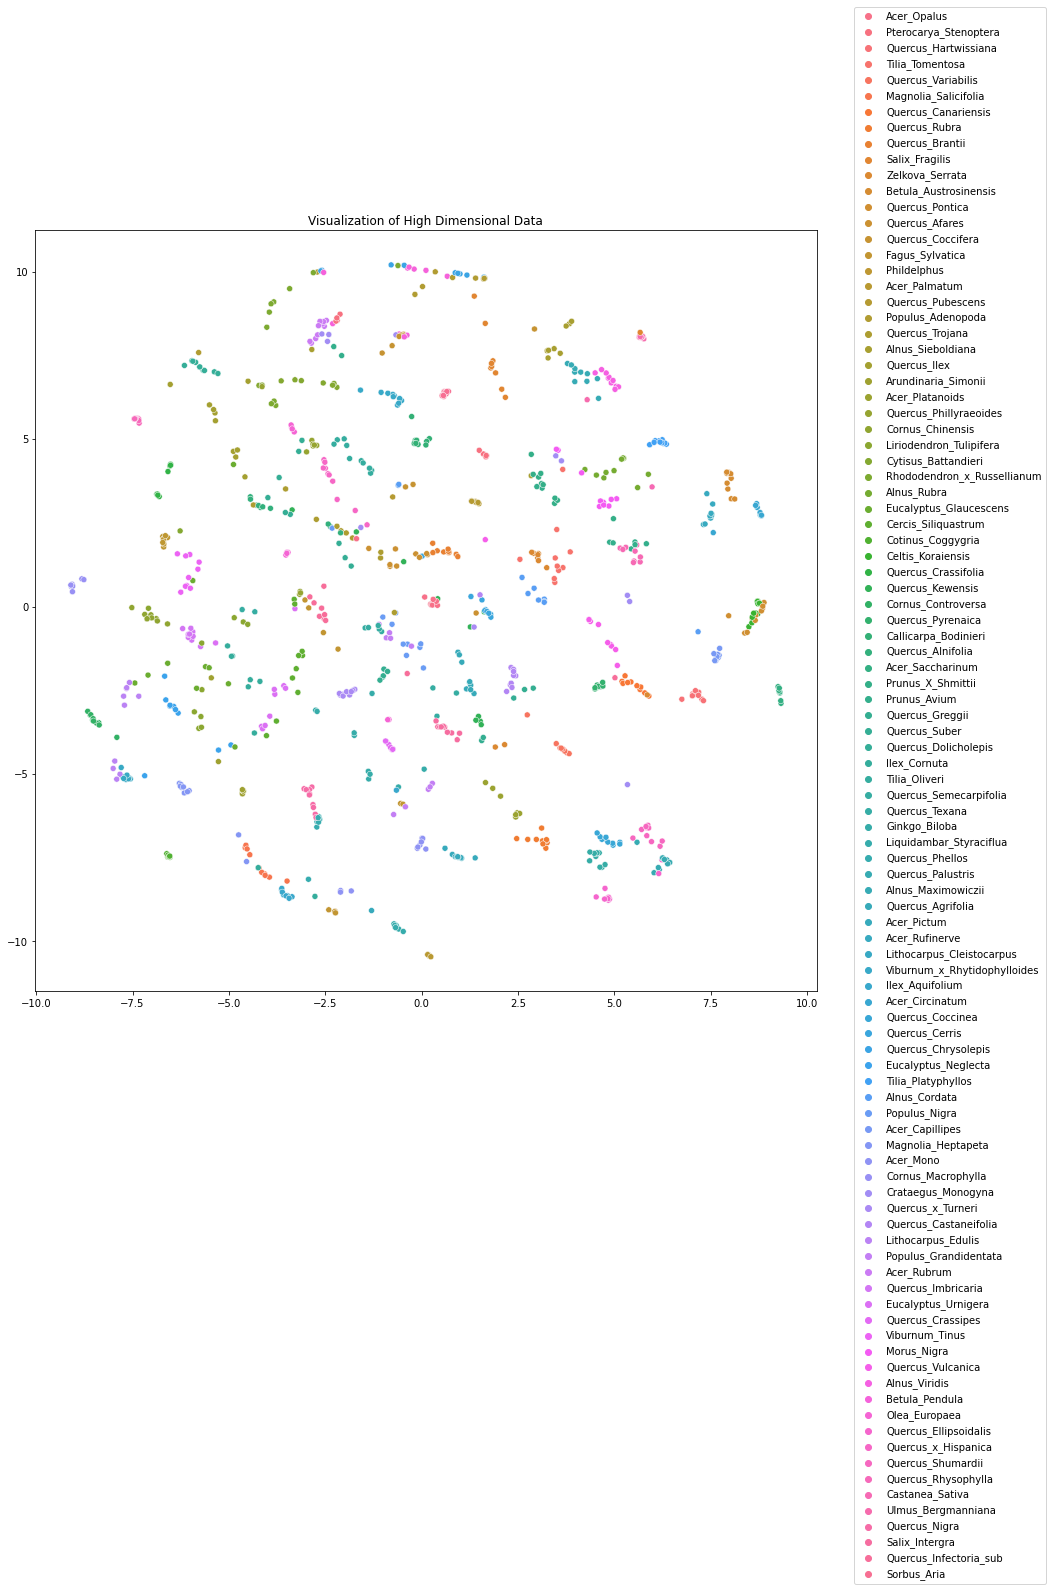

In [23]:
# visualize the data
plt.figure(figsize=(14,14))
plt.title('Visualization of High Dimensional Data')
plot = sns.scatterplot(x= embedded_x, y= embedded_y, hue= y_train['species'], legend= 'auto')
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1.3))

### 1.5 Drawing of some  Images

In [24]:
def create_image_paths(images_ids):
    images_paths = []
    img = plt.imread('images/1.jpg')
    source_folder = 'images/'
    for id in images_ids:
        img_path = source_folder + str(id) + '.jpg'
        images_paths.append(img_path)
    return images_paths

def draw_some_images(images_paths):
    fig , axis = plt.subplots(2,4)
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # load images
    images = []
    for path in images_paths:
        images.append(plt.imread(path))
    i , j = 0 , 0
    for img in images:
        axis[i,j].imshow(img,cmap='gray')
        j = j + 1
        if j == 4:
            i = i + 1
            j = 0

Drawing of some random images from the images folder every time


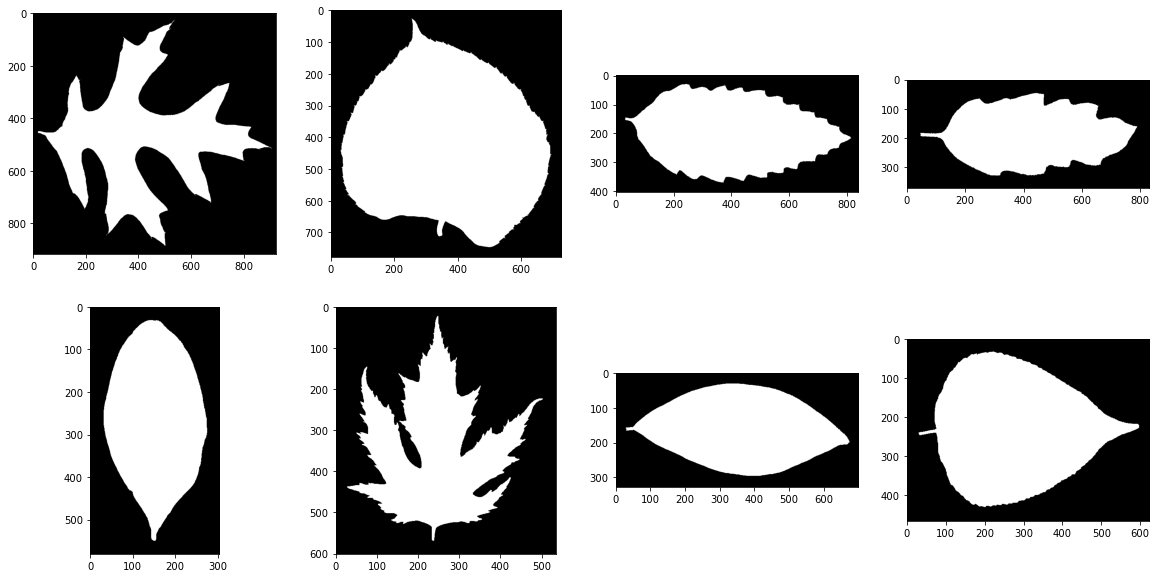

In [25]:
random_ids = [random.randint(0,(train.shape[0] + test.shape[0] + 1)) for i in range(8)]
images_paths = create_image_paths(random_ids)
draw_some_images(images_paths)
print('Drawing of some random images from the images folder every time')

### 1.6 Carry out required correlation analysis

In [26]:
# view correlations between columns
correlation_matrix = X_train.corr()
correlation_matrix

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
margin1,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,0.397138,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,0.162587,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,0.008772,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,-0.173986,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
margin5,-0.475874,-0.444312,-0.185007,0.029480,1.000000,-0.438587,-0.108178,0.056557,0.196745,-0.320647,...,-0.165622,0.059135,0.012938,0.155327,0.149420,0.006542,-0.109229,0.151675,0.022299,-0.148834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,0.035072,0.081069,-0.019850,-0.052317,0.006542,0.066262,-0.034094,0.048647,-0.028292,0.020376,...,-0.129365,0.004412,-0.155187,0.240704,-0.183369,1.000000,-0.051838,0.265879,-0.089679,-0.190194
texture61,-0.007581,-0.007057,0.084957,0.320644,-0.109229,-0.050498,-0.163375,-0.079283,0.088517,-0.127373,...,-0.002235,0.053707,-0.072814,-0.084638,-0.023539,-0.051838,1.000000,-0.063582,-0.068065,0.036374
texture62,-0.033159,-0.037405,-0.081999,-0.073886,0.151675,-0.031555,0.015391,-0.048843,-0.031954,-0.014200,...,-0.217239,0.171577,-0.283316,0.563088,-0.128010,0.265879,-0.063582,1.000000,-0.058189,-0.245527
texture63,-0.075171,-0.098957,-0.148193,0.050970,0.022299,-0.132087,-0.001364,0.027758,-0.119494,-0.039193,...,-0.207887,0.002057,-0.064724,-0.059866,0.156568,-0.089679,-0.068065,-0.058189,1.000000,0.029305


<AxesSubplot:title={'center':'Correlation between Columns'}>

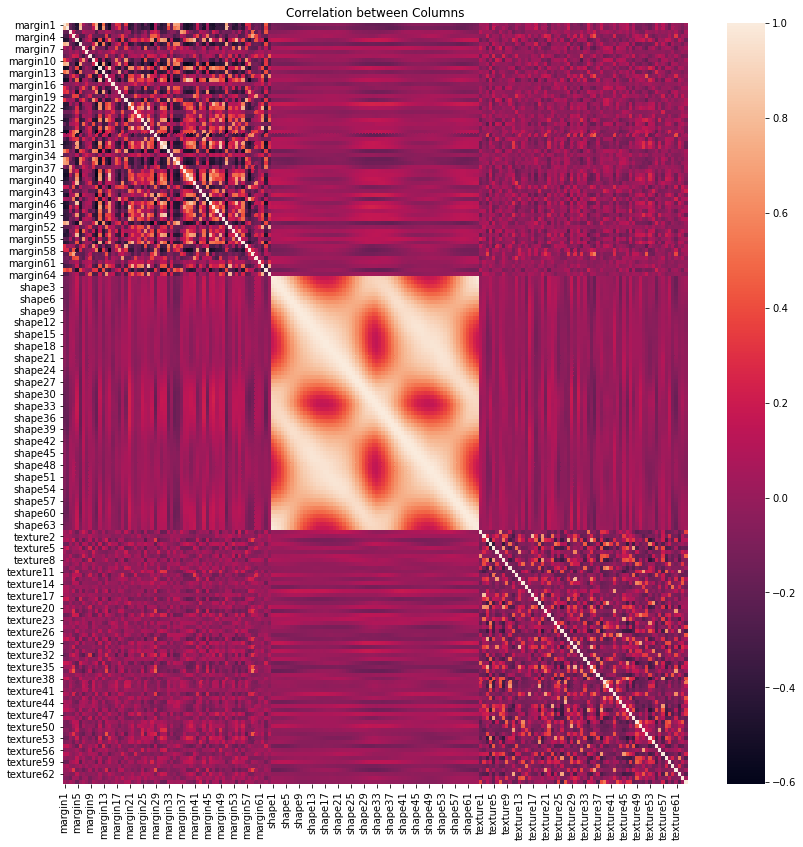

In [27]:
# visualize the correlation between columns
plt.figure(figsize=(14,14))
plt.title('Correlation between Columns')
sns.heatmap(correlation_matrix)

In [28]:
# take absolute values
correlation_matrix_abs = correlation_matrix.abs()
upper_matrix = correlation_matrix_abs.where(np.triu(np.ones(correlation_matrix_abs.shape),k=1).astype(np.bool_))
# check to see if there is a column has a correlation higher than 0.9
correlation_threshold = 0.9
col_with_high_correlation = [col for col in upper_matrix.columns if np.any(upper_matrix[col] > correlation_threshold)]
print('Columns in the Data that has high correlations are:\n',col_with_high_correlation)

Columns in the Data that has high correlations are:
 ['shape2', 'shape3', 'shape4', 'shape5', 'shape6', 'shape7', 'shape8', 'shape9', 'shape10', 'shape11', 'shape12', 'shape13', 'shape14', 'shape15', 'shape16', 'shape17', 'shape18', 'shape19', 'shape20', 'shape21', 'shape22', 'shape23', 'shape24', 'shape25', 'shape26', 'shape27', 'shape28', 'shape29', 'shape30', 'shape31', 'shape32', 'shape33', 'shape34', 'shape35', 'shape36', 'shape37', 'shape38', 'shape39', 'shape40', 'shape41', 'shape42', 'shape43', 'shape44', 'shape45', 'shape46', 'shape47', 'shape48', 'shape49', 'shape50', 'shape51', 'shape52', 'shape53', 'shape54', 'shape55', 'shape56', 'shape57', 'shape58', 'shape59', 'shape60', 'shape61', 'shape62', 'shape63', 'shape64']


We can see that all **Shape** columns has very high correlations with each other as we set a high correlation threshold with **0.9**, so we will drop all **Shape** columns from the data and this will help to reduce the complexity of data

In [29]:
# drop shape columns from X_train and also X_test
X_train = X_train.drop(columns=col_with_high_correlation)
X_test = X_test.drop(columns=col_with_high_correlation)

In [30]:
# view shape of X_train after removing high correlated columns
X_train.shape

(990, 129)

In [31]:
# view shape of X_test after removing high correlated columns
X_test.shape

(594, 129)

### 2. Divide the data into a training and test set using approximately 80% for training
Data is divided already in kaggle into a **Train** and **Test** data so we don't need to apply any divide process here 

### 3. Standardize the data, by computing the mean and standard deviation for each feature dimension using the training set only, then subtracting the mean and dividing by the stdev for each feature and each sample.

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)

In [33]:
# view the X_train after standradization
X_train_scaled

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,-0.486611,-0.131357,-0.330956,-0.682244,-0.138444,-0.554066,0.465218,-0.395064,-0.584019,0.906636,...,-0.452710,-0.260149,-0.560872,-0.345848,1.242752,-0.233151,-0.235610,-0.394871,-0.652143,0.262397
1,-0.585602,-0.734880,-0.028561,-0.269558,0.605389,-0.704306,0.018812,-0.395064,-0.802765,-0.674054,...,-0.560567,-0.260149,-0.687151,-0.423884,0.478218,-0.233151,-0.235610,-0.494974,2.181670,0.133641
2,-0.585602,-0.483408,-0.482192,-0.544694,-0.563515,-0.629196,2.808662,-0.395064,-0.802765,1.636190,...,1.858873,-0.260149,-0.434636,-0.423884,-0.541291,-0.233151,-0.235610,-0.520012,0.835641,-0.724631
3,-0.882575,-0.634302,-0.330956,-0.613469,0.392826,-0.366289,0.242044,-0.395064,0.728566,-0.066082,...,-0.575984,-0.209558,-0.687151,-0.462921,0.287052,-0.233151,-0.235610,-0.069525,-0.652143,1.249425
4,-0.585602,-0.634302,0.651866,-0.475883,-0.032190,-0.441400,-0.762355,-0.395064,-0.802765,-0.795636,...,0.949628,-0.260149,0.238782,-0.462921,-1.050981,-0.233151,-0.235610,-0.520012,-0.652143,0.519866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,2.186354,2.332949,-0.935823,-0.682244,-0.776023,2.112575,-0.092775,-0.395064,-0.584019,1.514608,...,3.245778,-0.260149,0.785964,-0.462921,-0.350125,-0.233151,-0.235610,-0.520012,-0.652143,-0.038005
986,-0.783584,-0.634302,-0.406593,2.963011,-0.669769,-0.741862,-1.097116,-0.395064,2.478642,-0.917218,...,2.120821,-0.260149,0.112546,-0.462921,-0.286381,-0.233151,-0.235610,-0.494974,-0.652143,0.090707
987,-0.783584,-0.634302,-1.238218,-0.063233,3.474413,-0.666751,-0.650767,-0.395064,-0.365274,-1.160382,...,-0.498930,-0.209558,-0.476700,0.629651,0.032207,-0.103212,-0.235610,0.180757,-0.652143,-0.767565
988,-0.882575,-0.734880,0.576267,1.174824,-0.244698,-0.741862,-1.097116,-0.395064,3.353624,-1.038800,...,0.733884,1.307466,-0.645044,-0.345848,-0.095280,-0.233151,3.445062,-0.520012,-0.510460,-0.724631


In [34]:
# apply the transformation to the X_test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

In [35]:
# view the X_test after standradization
X_test_scaled

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.107387,-0.483408,1.785924,-0.407108,-0.563515,-0.441400,-0.762355,-0.395064,-0.146528,0.298726,...,-0.468111,-0.260149,-0.013733,-0.423884,-0.031537,-0.233151,-0.23561,-0.520012,-0.368776,1.506894
1,-0.486611,-0.584012,1.256694,-0.475883,-0.563515,-0.478955,-0.650767,-0.395064,2.916133,0.298726,...,-0.575984,-0.260149,-0.392528,-0.384886,-0.158959,-0.233151,-0.23561,-0.494974,2.039986,1.120669
2,-0.882575,-0.734880,-1.162619,-0.063233,1.455476,-0.741862,0.242044,-0.395064,0.509820,-0.795636,...,1.458218,-0.260149,-0.645044,-0.462921,-1.050981,-0.233151,-0.23561,-0.119577,-0.652143,-0.853387
3,-0.882575,-0.734880,-0.860185,-0.407108,0.180318,-0.741862,-0.873942,-0.395064,-0.365274,-1.038800,...,-0.375656,0.548954,-0.560872,0.980829,-0.158959,-0.233151,-0.23561,1.782500,-0.652143,-0.467163
4,-0.783584,-0.734880,-0.633389,-0.475883,1.349168,-0.741862,-0.539123,-0.395064,-0.146528,-1.160382,...,-0.575984,1.964897,0.028374,-0.033708,1.625084,-0.233151,-0.23561,-0.319807,0.056346,-0.510096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-0.882575,-0.734880,-1.087020,-0.269558,1.455476,-0.741862,-0.092775,-0.395064,-0.146528,-0.309246,...,0.980447,-0.260149,-0.476700,-0.462921,-0.796136,-0.233151,-0.23561,-0.044487,-0.652143,-0.810454
590,-0.882575,-0.634302,-1.087020,-0.613469,0.180318,-0.741862,-0.092775,1.742148,-0.802765,-0.795636,...,-0.375656,-0.007295,-0.476700,-0.345848,-0.413804,-0.233151,-0.23561,1.807513,-0.652143,-0.123828
591,0.008396,0.019511,-0.633389,-0.338333,-0.563515,-0.441400,0.353631,-0.395064,-0.802765,-0.552410,...,0.579776,-0.260149,0.533405,-0.462921,-0.923558,-0.233151,-0.23561,-0.520012,2.465109,-0.552986
592,-0.189587,-0.483408,1.105497,0.074353,1.136660,-0.253604,1.134741,-0.395064,-0.365274,0.298726,...,-0.514347,-0.260149,-0.645044,-0.462921,-0.286381,-0.233151,-0.23561,-0.520012,0.198030,-0.038005


### 4. Encode the labels

In [36]:
y_train_encoded = pd.get_dummies(y_train['species'])
# view of the labels after doing one hot encoding
y_train_encoded

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Part2: Training a neural network

### Custom Callback

In [37]:
class Mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if logs['accuracy'] > 0.96:
            print('\nReached required accuracy above 96%, cancel training!')
            self.model.stop_training = True

### Model Architecture

In [43]:
# define the model architecture
def DenseMLP(input_shape, hidden_size, output_size, batch_size, dropout_rate, dropout = False):
    if dropout:
        model = Sequential([
        # input layer
        Input(shape=(batch_size,input_shape[0],input_shape[1])),
        # one hidden layer
        Dense(units = hidden_size, activation = 'tanh'),
        # dropout layer
        Dropout(rate = dropout_rate),
        # output layer
        Dense(units = output_size, activation = 'softmax')
        ])
    else:
        model = Sequential([
        # input layer
        Input(shape=(batch_size,input_shape[0],input_shape[1])),
        # one hidden layer
        Dense(units = hidden_size, activation = 'tanh'),
        # output layer
        Dense(units = output_size, activation = 'softmax')
        ])
    
    return model

### Training Function

In [44]:
# define the training function which accepts many hyperparameters
def training(X, y, input_shape, output_size, batch_size, hidden_size, optimizer, 
             regularization, learning_rate_scheduler, dropout_rate, dropout = False):
    # model initialization
    model = DenseMLP(input_shape= input_shape, hidden_size= hidden_size, output_size= output_size, 
                     batch_size= batch_size, dropout_rate= dropout_rate, dropout= dropout)
    # compile the model
    model.compile(optimizer = optimizer, loss = CategoricalCrossentropy(), metrics = ['accuracy'])
    # callbacks
    callback1 = learning_rate_scheduler
    callback2 = Mycallback()
    # model fit
    model.fit(x= X,y= y, batch_size= batch_size, epochs = 500, verbose= 0, callbacks= [callback1,callback2])

### Hyperparameters settings #1

We will explore first hyperparameter which is **Batch size** while keeping all other hyperparameters fixed

In [45]:
batch_size = [64, 128, 256]
HIDDEN_SIZE = 128
LEARNING_RATE = 1e-8
OPTIMIZER = Adam()
REGULARIZATION = None
LEARNING_RATE_SCHEDULAR = LearningRateScheduler(lambda epoch: LEARNING_RATE * 10**(epoch / 20))
DROPOUT_RATE = 0.2
DROPOUT = True

### Training the model #1

In [46]:
for batch in batch_size:
    print('Start training for Batch size =', str(batch) + '\n')
    training(X_train_scaled, y_train_encoded, X_train.shape, y_train_unique_length, batch, 
    HIDDEN_SIZE, OPTIMIZER, REGULARIZATION, LEARNING_RATE_SCHEDULAR, DROPOUT_RATE, DROPOUT)
    print('\nEnd training for Batch size =', str(batch) + '\n')

Start training for Batch size = 64


Reached required accuracy above 96%, cancel training!

End training for Batch size = 64

Start training for Batch size = 128


Reached required accuracy above 96%, cancel training!

End training for Batch size = 128

Start training for Batch size = 256


Reached required accuracy above 96%, cancel training!

End training for Batch size = 256



### Evaluation Function

In [42]:
# define the evaluation function which loads the trained model and evaluate its performance on train/test set
def evaluation():
    pass